# Infinite Dilution Acitivity Coefficient
**Exploratory Data Analysis**

In [7]:
import pandas as pd

df = pd.read_csv('../data/IDAC_data_clean.csv')
df.head(3)

,solute,solvent,T_K,IDAC_exp,IDAC_MOSCED,ln_IDAC_exp
0,"1,1,1-Trichloroethane","1,2-Dichloroethane",328.2,1.34,1.28,0.292670
1,"1,1,1-Trichloroethane",1-Octanol,298.2,1.98,1.89,0.683097
2,"1,1,1-Trichloroethane",1-Octanol,298.2,1.89,1.89,0.636577


## 1. Distribution and range of $T$, $\gamma^{\infty}$, and $ln(\gamma^{\infty})$

In [8]:
print(f'Temperature range: {df.T_K.min(): 10.3f} - {df.T_K.max(): <10.3f} [K]')
print(f'IDAC range:        {df.IDAC_exp.min(): 10.3f} - {df.IDAC_exp.max(): <10.3f}')
print(f'ln(IDAC) range:    {df.ln_IDAC_exp.min(): 10.3f} - {df.ln_IDAC_exp.max(): <10.3f}')

Temperature range:    238.200 - 473.200    [K]
IDAC range:             0.040 - 264.980   
ln(IDAC) range:        -3.219 - 5.580     


In [9]:
df.describe()

,T_K,IDAC_exp,IDAC_MOSCED,ln_IDAC_exp
count,6441.000000,6441.000000,6441.000000,6441.000000
mean,316.284164,6.771868,6.635819,1.075698
std,23.272631,13.534843,13.062203,1.184360
min,238.200000,0.040000,0.050000,-3.218876
25%,298.200000,1.200000,1.220000,0.182322
50%,313.200000,2.410000,2.410000,0.879627
75%,328.300000,5.870000,5.770000,1.769855
max,473.200000,264.980000,259.750000,5.579654


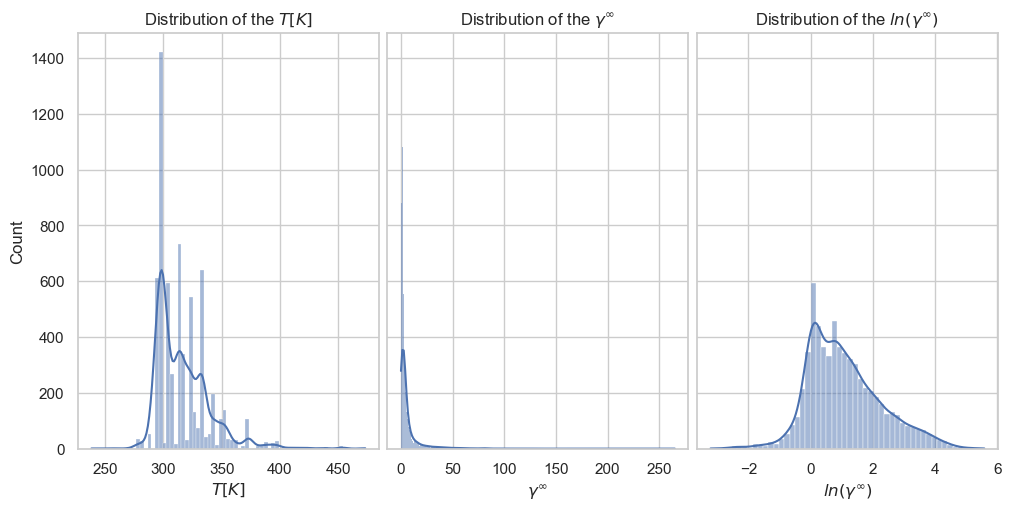

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(10, 5), layout='constrained', sharey=True)

sns.histplot( data=df, x='T_K', kde=True, ax=axs[0])
axs[0].set_title(r'Distribution of the $T [K]$')
axs[0].set_xlabel(r'$T [K]$')

sns.histplot( data=df,  x='IDAC_exp', kde=True,  ax=axs[1])
axs[1].set_title(r'Distribution of the $\gamma^{\infty}$')
axs[1].set_xlabel(r'$\gamma^{\infty}$')

sns.histplot( data=df,  x='ln_IDAC_exp', kde=True,  ax=axs[2])
axs[2].set_title(r'Distribution of the $ln(\gamma^{\infty})$')
axs[2].set_xlabel(r'$ln(\gamma^{\infty})$');

# 2. Solvents and Solutes properties

In [11]:
solvents = df.solvent.unique()
solutes = df.solute.unique()
print(f'Number of Solvents: {len(solvents)}')
print(f'Number of Solutes:  {len(solutes)}')

Number of Solvents: 111
Number of Solutes:  109


In [12]:
import pandas as pd
components = pd.read_csv('../data/components2.csv')
components.head(3)

,name,SMILES,CAS,Tc,Pc,Vc,omega,dipole,MW
0,"1,2-Dichloroethane",C(CCl)Cl,107-06-2,561.6,5226120.0,0.000231,0.2680,2.940000,98.95916
1,1-Octanol,CCCCCCCCO,111-87-5,652.5,2777000.0,0.000497,0.5963,1.649998,130.22792
2,Anisole,COC1=CC=CC=C1,100-66-3,646.5,4240000.0,0.000341,0.3288,1.260000,108.13782


In [13]:
components.describe()

,Tc,Pc,Vc,omega,dipole,MW
count,133.000000,1.330000e+02,133.000000,1.330000e+02,133.000000,133.000000
mean,598.012841,4.050538e+06,0.000361,4.049039e-01,1.071722,106.300014
std,90.413735,1.314019e+06,0.000213,2.822874e-01,1.268418,49.245174
min,369.890000,6.000000e+05,0.000114,7.160000e-07,0.000000,32.041860
25%,536.200000,3.161000e+06,0.000256,2.532000e-01,0.000000,78.111840
50%,579.254360,4.080000e+06,0.000321,3.396000e-01,0.390000,98.959160
75%,652.500000,4.750000e+06,0.000389,4.433000e-01,1.720000,115.130460
max,855.000000,8.215850e+06,0.002060,2.277847e+00,4.220000,422.813280


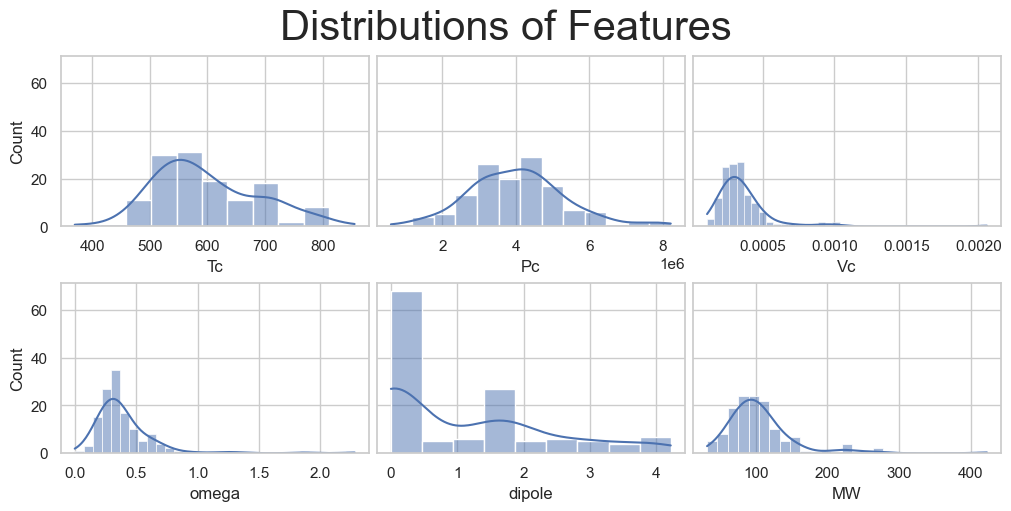

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

fig, axs = plt.subplots(2, 3, layout='constrained', sharey=True, figsize=(10, 5))

sns.histplot(data=components, x='Tc', kde=True, ax=axs[0,0])
sns.histplot(data=components, x='Pc', kde=True, ax=axs[0,1])
sns.histplot(data=components, x='Vc', kde=True, ax=axs[0,2])

sns.histplot(data=components, x='omega', kde=True, ax=axs[1,0])
sns.histplot(data=components, x='dipole', kde=True, ax=axs[1,1])
sns.histplot(data=components, x='MW', kde=True, ax=axs[1,2])

fig.suptitle(r'Distributions of Features', fontsize=30);